# Plot the figures shown on the manuscript

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import string

## Plot fig. 2  => Phase diagram & cross section

In [2]:
def read_mean_std(str1 = "nu", str2 = "w1", str3 = "w2", n1 = 0.2, n2 = 1):
    
    def read_data(nu):
    
        if int(nu) == nu: nu = int(nu)

        path = os.path.join('..', 'data', 'fig2-ds', f'{str1}{n1}{str2}{n2}', f"{str3}{nu}.out" )

        lines = [x.rstrip() for x in open(path)]

        A = np.array([float(j) for i in range(len(lines)) for j in lines[i].split(" ")]) 
        B = A.reshape(-1, 2)

        return B[0:60, :]


    nu_list = np.arange(0, 100.1, 1)/100 #51
    nu_l = len(nu_list)
    ymean_std = np.zeros((nu_l, 2))

    for i in range(nu_l):

        nu_ = nu_list[i]

        B6 = read_data(nu_)

        Bm = B6.mean(axis = 1)    
        ymean_std[i, 0] = Bm.mean()    
        ymean_std[i, 1] = Bm.std()
        
    return ymean_std

In [3]:
file_path = os.path.join('..', 'data', 'fig2-ds', f"MFmu_0258_w1_1.dat")
result = pickle.load(open(file_path, "rb"))
nu_list = np.linspace(0, 1, 100)
rho_mf_1 = np.zeros((300, 2))
for i in range(300):   
    rho_mf_1[i, :] = result[i][0]
    

    
file_path = os.path.join('..', 'data', 'fig2-ds',  f"TLmu_0258_w1_1.dat")
result = pickle.load(open(file_path, "rb"))
# nu_list = np.linspace(0, 1, 100)
rho_tl_1 = np.zeros((300, 2))
for i in range(300):   
    rho_tl_1[i, :] = result[i][0][0]

    
    
file_path = os.path.join('..', 'data', 'fig2-ds', f"MFmu_0258_w2_1.dat")
result = pickle.load(open(file_path, "rb"))
# nu_list = np.linspace(0, 1, 100)
rho_mf_2 = np.zeros((300, 2))
for i in range(300):   
    rho_mf_2[i, :] = result[i][0]

    
    
file_path = os.path.join('..', 'data', 'fig2-ds', f"TLmu_0258_w2_1.dat")
result = pickle.load(open(file_path, "rb"))
# nu_list = np.linspace(0, 1, 100)
rho_tl_2 = np.zeros((300, 2))
for i in range(300):   
    rho_tl_2[i, :] = result[i][0][0]

    
file_path = os.path.join('..', 'data', 'fig2-ds', f"MFw1_278.dat")
result = pickle.load(open(file_path, "rb"))
nu_list = np.linspace(0, 1, 100)
rho_mf_w1 = np.zeros((300, 2))
for i in range(300):   
    rho_mf_w1[i, :] = result[i][0]
    

    
file_path = os.path.join('..', 'data', 'fig2-ds', f"TLw1_278.dat")
result = pickle.load(open(file_path, "rb"))
# nu_list = np.linspace(0, 1, 100)
rho_tl_w1 = np.zeros((300, 2))
for i in range(300):   
    rho_tl_w1[i, :] = result[i][0][0]

    
    
file_path = os.path.join('..', 'data', 'fig2-ds', f"MFw2_278.dat")
result = pickle.load(open(file_path, "rb"))
# nu_list = np.linspace(0, 1, 100)
rho_mf_w2 = np.zeros((300, 2))
for i in range(300):   
    rho_mf_w2[i, :] = result[i][0]

    
    
file_path = os.path.join('..', 'data', 'fig2-ds', f"TLw2_278.dat")
result = pickle.load(open(file_path, "rb"))
# nu_list = np.linspace(0, 1, 100)
rho_tl_w2 = np.zeros((300, 2))
for i in range(300):   
    rho_tl_w2[i, :] = result[i][0][0]


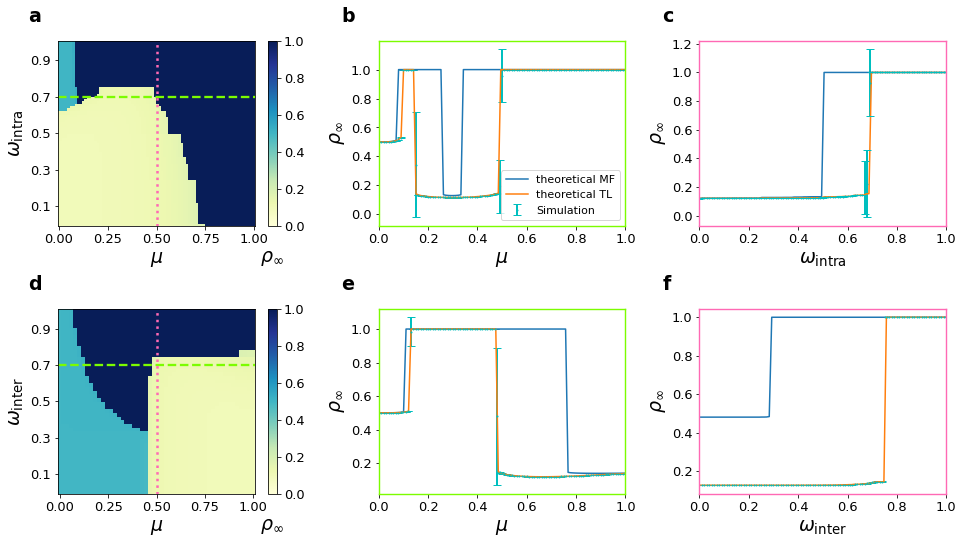

In [4]:
fig, axs = plt.subplots(2, 3, figsize = (14, 6), facecolor = 'white')

fz = 19
tick = 13
colorlabel = 19

loc = os.path.join('..', 'data', 'fig2-ds',"w1-mu.h5")

f = h5py.File(loc, 'r')

w1_list = f["w1"][()]
mu_list = f["mu"][()]
rho_inf = f["rho"][()]

f.close()

mu_mesh, w_mesh = np.meshgrid(mu_list, w1_list)
p1 = axs[0, 0].pcolor(mu_mesh, w_mesh, rho_inf, shading = 'auto', cmap='YlGnBu')
p1.set_clim(0, 1)
cb = plt.colorbar(p1, ax= axs[0, 0])

# 将标签添加到 colorbar 的正下方
cb.ax.set_xlabel(r"$\rho_{\infty}$", fontsize = colorlabel, labelpad = 23)
cb.ax.tick_params(labelsize=tick)

plt.tight_layout()

loc = os.path.join('..', 'data', 'fig2-ds',"w2-mu.h5")

f = h5py.File(loc, 'r')

w2_list = f["w2"][()]
mu_list = f["mu"][()]

rho_inf = f["rho"][()]

f.close()

mu_mesh, w_mesh = np.meshgrid(mu_list, w2_list)

p2 = axs[1, 0].pcolor(mu_mesh, w_mesh, rho_inf, shading = 'auto', cmap='YlGnBu')
p2.set_clim(0, 1)
cb = plt.colorbar(p2, ax= axs[1, 0])
cb.ax.set_xlabel(r"$\rho_{\infty}$", fontsize = colorlabel, labelpad = 23)
cb.ax.tick_params(labelsize=tick)


axs[1, 0].axhline(y = 0.7, color = 'lawngreen', linestyle = '--', linewidth = 2.3)
axs[1, 0].axvline(x = 0.5, color = 'Hotpink', linestyle = ':', linewidth = 2.5)
axs[0, 0].axhline(y = 0.7, color = 'lawngreen', linestyle = '--', linewidth = 2.3)
axs[0, 0].axvline(x = 0.5, color = 'Hotpink', linestyle = ':', linewidth = 2.5)

ys = read_mean_std(str1 = "w1", str2 = "w2", str3 = "nu", n1 = 0.7, n2 = 1)   
axs[0, 1].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[0, 1].plot(np.linspace(0, 1, 100), rho_mf_w1[1:300:3].mean(axis = 1), label = "theoretical MF")
axs[0, 1].plot(np.linspace(0, 1, 100), rho_tl_w1[1:300:3].mean(axis = 1), label = "theoretical TL")

axs[0, 1].set_xlim(0, 1)
axs[0, 1].legend(loc ='best', fontsize = 11, frameon = True)


ys = read_mean_std(str1 = "w1", str2 = "w2", str3 = "nu", n1 = 1, n2 = 0.7)
axs[1, 1].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], #, uplims = True, lolims = True
                  fmt='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[1, 1].plot(np.linspace(0, 1, 100), rho_mf_w2[1:300:3].mean(axis = 1), label = "theoretical MF")
axs[1, 1].plot(np.linspace(0, 1, 100), rho_tl_w2[1:300:3].mean(axis = 1), label = "theoretical TL")

axs[1, 1].set_xlim(0, 1)
#axs[1, 1].legend(loc = 'lower left', fontsize = 11, frameon = False)

axs[0, 0].set_xlabel(r"$\mu$", fontsize = fz);
axs[0, 0].set_ylabel(r"$\omega_{\mathrm{intra}}$", fontsize = fz);
axs[1, 0].set_xlabel(r"$\mu$", fontsize = fz);
axs[1, 0].set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = fz);

axs[0, 1].set_xlabel(r"$\mu$", fontsize = fz);
axs[0, 1].set_ylabel(r"$\rho_{\infty}$", fontsize = fz);

my_yticks = [0.1, 0.3, 0.5, 0.7, 0.9]
axs[0, 0].set_yticks(my_yticks)
axs[1, 0].set_yticks(my_yticks)

axs[1, 1].set_xlabel(r"$\mu$", fontsize = fz);
axs[1, 1].set_ylabel(r"$\rho_{\infty}$", fontsize = fz);

axs[0, 0].annotate(r"a", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 19, fontweight='bold')
axs[0, 1].annotate(r"b", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 19, fontweight='bold')
axs[1, 0].annotate(r"d", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 19, fontweight='bold')
axs[1, 1].annotate(r"e", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 19, fontweight='bold')

axs[0, 2].annotate(r"c", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 19, fontweight='bold')
axs[1, 2].annotate(r"f", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 19, fontweight='bold')

axs[0, 2].plot(np.linspace(0, 1, 100), rho_mf_1[100:200].mean(axis = 1), label = "theoretical MF")
axs[0, 2].plot(np.linspace(0, 1, 100), rho_tl_1[100:200].mean(axis = 1), label = "theoretical TL")

ys = read_mean_std(str1 = "nu", str2 = "w2", str3 = "w1", n1 = 0.5, n2 = 1)   
axs[0, 2].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[0, 2].set_xlim(0, 1)

ys = read_mean_std(str1 = "nu", str2 = "w1", str3 = "w2", n1 = 0.5, n2 = 1)   
axs[1, 2].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)

axs[1, 2].plot(np.linspace(0, 1, 100), rho_mf_2[100:200].mean(axis = 1), label = "theoretical MF")
axs[1, 2].plot(np.linspace(0, 1, 100), rho_tl_2[100:200].mean(axis = 1), label = "theoretical TL")
axs[1, 2].set_xlim(-0.0, 1.)

#axs[1, 2].legend(loc = 'center', bbox_to_anchor = (0.52, 0.5), fontsize = 11, frameon=False)

#axs[0, 2].legend(loc = 'upper left', fontsize = 11, frameon=False)

axs[0, 2].set_xlabel(r"$\omega_\mathrm{intra}$", fontsize = fz);
axs[0, 2].set_ylabel(r"$\rho_{\infty}$", fontsize = fz);

axs[1, 2].set_xlabel(r"$\omega_\mathrm{inter}$", fontsize = fz);
axs[1, 2].set_ylabel(r"$\rho_{\infty}$", fontsize = fz);

# 1. 设置 b, e (axs[0, 1], axs[1, 1]) 的外框颜色
for ax in [axs[0, 1], axs[1, 1]]:
    for spine in ax.spines.values():
        spine.set_edgecolor('lawngreen')
        # (可选) 你可以取消注释下一行来增加线宽，让颜色更明显
        spine.set_linewidth(1.4) 

# 2. 设置 c, f (axs[0, 2], axs[1, 2]) 的外框颜色
for ax in [axs[0, 2], axs[1, 2]]:
    for spine in ax.spines.values():
        spine.set_edgecolor('hotpink')
        # (可选) 增加线宽
        spine.set_linewidth(1.4)

for ax in axs.flat: 
    ax.tick_params(axis='both', which='major', labelsize=tick) 

fig.subplots_adjust(hspace = 0.45, wspace = 0.3, left = 0.1)

fig.set_size_inches(14, 7)

fig.savefig("fig2.pdf", format = 'pdf', bbox_inches = 'tight', dpi = 600)

## Reliability test of the fig. 2

In [5]:
fig, axs = plt.subplots(2, 2, facecolor = 'white')

ys = read_mean_std(str1 = "w1", str2 = "w2", str3 = "nu", n1 = 0.2, n2 = 1)   
axs[0, 0].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[0, 0].plot(np.linspace(0, 1, 100), rho_mf_w1[0:300:3].mean(axis = 1), label = "theoretical MF")
axs[0, 0].plot(np.linspace(0, 1, 100), rho_tl_w1[0:300:3].mean(axis = 1), label = "theoretical TL")


ys = read_mean_std(str1 = "w1", str2 = "w2", str3 = "nu", n1 = 0.8, n2 = 1) 
axs[0, 1].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[0, 1].plot(np.linspace(0, 1, 100), rho_mf_w1[2:300:3].mean(axis = 1), label = "theoretical MF")
axs[0, 1].plot(np.linspace(0, 1, 100), rho_tl_w1[2:300:3].mean(axis = 1), label = "theoretical TL")

ys = read_mean_std(str1 = "w1", str2 = "w2", str3 = "nu", n1 = 1, n2 = 0.2) 
axs[1, 0].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[1, 0].plot(np.linspace(0, 1, 100), rho_mf_w2[0:300:3].mean(axis = 1), label = "theoretical MF")
axs[1, 0].plot(np.linspace(0, 1, 100), rho_tl_w2[0:300:3].mean(axis = 1), label = "theoretical TL")

ys = read_mean_std(str1 = "w1", str2 = "w2", str3 = "nu", n1 = 1, n2 = 0.8) 
axs[1, 1].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[1, 1].plot(np.linspace(0, 1, 100), rho_mf_w2[2:300:3].mean(axis = 1), label = "theoretical MF")
axs[1, 1].plot(np.linspace(0, 1, 100), rho_tl_w2[2:300:3].mean(axis = 1), label = "theoretical TL")


axs[0, 0].set_ylim(-0.1, 1.2)
axs[0, 1].set_ylim(-0.1, 1.2)
axs[1, 0].set_ylim(-0.1, 1.2)
axs[1, 1].set_ylim(-0.1, 1.2)

axs[0, 0].legend(loc = 'best', fontsize = 10)
axs[0, 1].legend(loc = 'best', fontsize = 10)
axs[1, 0].legend(loc = 'best', fontsize = 10)
axs[1, 1].legend(loc = 'best', fontsize = 10)

axs[0, 0].annotate(r"a", (-0.3, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')
axs[0, 1].annotate(r"b", (-0.25, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')
axs[1, 0].annotate(r"c", (-0.3, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')
axs[1, 1].annotate(r"d", (-0.25, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')

fig.subplots_adjust(hspace = 0.4, wspace = 0.45, left = 0.1)

fig.set_size_inches(8, 6)

axs[0, 0].set_xlabel(r"$\mu$", fontsize = 16)
axs[0, 0].set_ylabel(r"$\rho_\infty$", fontsize = 16)

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=11) 


axs[0, 1].set_xlabel(r"$\mu$", fontsize = 18)
axs[0, 1].set_ylabel(r"$\rho_\infty$", fontsize = 18)

axs[1, 0].set_xlabel(r"$\mu$", fontsize = 18)
axs[1, 0].set_ylabel(r"$\rho_\infty$", fontsize = 18)

axs[1, 1].set_xlabel(r"$\mu$", fontsize = 18)
axs[1, 1].set_ylabel(r"$\rho_\infty$", fontsize = 18)
fig.savefig("appen1.pdf", format = 'pdf', bbox_inches = 'tight', dpi = 600)

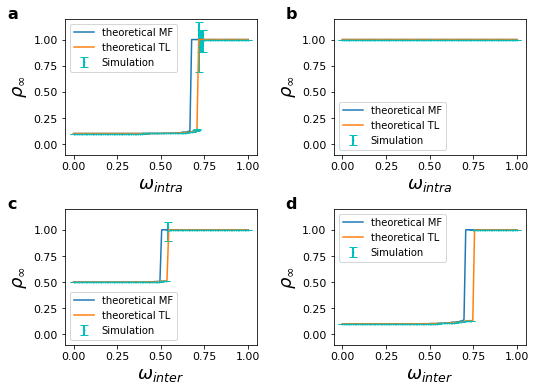

In [6]:

fig, axs = plt.subplots(2, 2, facecolor = 'white')

ys = read_mean_std(str1 = "nu", str2 = "w2", str3 = "w1", n1 = 0.2, n2 = 1)   
axs[0, 0].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[0, 0].plot(np.linspace(0, 1, 100), rho_mf_1[0:100].mean(axis = 1), label = "theoretical MF")
axs[0, 0].plot(np.linspace(0, 1, 100), rho_tl_1[0:100].mean(axis = 1), label = "theoretical TL")


ys = read_mean_std(str1 = "nu", str2 = "w2", str3 = "w1", n1 = 0.8, n2 = 1)   
axs[0, 1].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[0, 1].plot(np.linspace(0, 1, 100), rho_mf_1[200:300].mean(axis = 1), label = "theoretical MF")
axs[0, 1].plot(np.linspace(0, 1, 100), rho_tl_1[200:300].mean(axis = 1), label = "theoretical TL")

ys = read_mean_std(str1 = "nu", str2 = "w1", str3 = "w2", n1 = 0.2, n2 = 1)   
axs[1, 0].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[1, 0].plot(np.linspace(0, 1, 100), rho_mf_2[0:100].mean(axis = 1), label = "theoretical MF")
axs[1, 0].plot(np.linspace(0, 1, 100), rho_tl_2[0:100].mean(axis = 1), label = "theoretical TL")

ys = read_mean_std(str1 = "nu", str2 = "w1", str3 = "w2", n1 = 0.8, n2 = 1)   
axs[1, 1].errorbar(np.linspace(0, 1, 101), ys[:, 0], yerr = ys[:, 1], # uplims = True, lolims = True,
                  fmt ='.c', label ="Simulation", markersize = 2, elinewidth = 2, capsize = 4)
axs[1, 1].plot(np.linspace(0, 1, 100), rho_mf_2[200:300].mean(axis = 1), label = "theoretical MF")
axs[1, 1].plot(np.linspace(0, 1, 100), rho_tl_2[200:300].mean(axis = 1), label = "theoretical TL")


axs[0, 0].set_ylim(-0.1, 1.2)
axs[0, 1].set_ylim(-0.1, 1.2)
axs[1, 0].set_ylim(-0.1, 1.2)
axs[1, 1].set_ylim(-0.1, 1.2)

axs[0, 0].legend(loc = 'best', fontsize = 10)
axs[0, 1].legend(loc = 'best', fontsize = 10)
axs[1, 0].legend(loc = 'best', fontsize = 10)
axs[1, 1].legend(loc = 'best', fontsize = 10)

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=11) 

axs[0, 0].annotate(r"a", (-0.3, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')
axs[0, 1].annotate(r"b", (-0.25, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')
axs[1, 0].annotate(r"c", (-0.3, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')
axs[1, 1].annotate(r"d", (-0.25, 1), xycoords = 'axes fraction', fontsize = 16, fontweight='bold')

axs[0, 0].set_xlabel(r"$\omega_{intra}$", fontsize = 18)
axs[0, 0].set_ylabel(r"$\rho_\infty$", fontsize = 18)

axs[0, 1].set_xlabel(r"$\omega_{intra}$", fontsize = 18)
axs[0, 1].set_ylabel(r"$\rho_\infty$", fontsize = 18)

axs[1, 0].set_xlabel(r"$\omega_{inter}$", fontsize = 18)
axs[1, 0].set_ylabel(r"$\rho_\infty$", fontsize = 18)

axs[1, 1].set_xlabel(r"$\omega_{inter}$", fontsize = 18)
axs[1, 1].set_ylabel(r"$\rho_\infty$", fontsize = 18)


fig.subplots_adjust(hspace = 0.4, wspace = 0.4, left = 0.1)

fig.set_size_inches(8, 6)

fig.savefig("appen2.pdf", format = 'pdf', bbox_inches = 'tight', dpi = 600)

## Plot the fig. 3 => compare the PD from simulation & TL

In [7]:
# 刻度大小14 label大小22 colorbar刻度14 colorbarlabel22 标题大小20 abcd序号大小15
def plot_simu_diagram(mu, ax_):
    
    loc_ = os.path.join("..","data","fig3-ds","simulation", "theta0.1rho0.17N200000z20mu{}.h5")

    f = h5py.File(loc_.format(mu), 'r')
    w1_ = f['w1'][()]
    w2_ = f['w2'][()]
    rho_ = f["rho"][()]
    f.close()

    w1Mesh, w2Mesh = np.meshgrid(w1_, w2_)
#     fig, ax = plt.subplots(2,1,figsize = (4, 5.5),dpi = 150)
    pc = ax_.pcolor(w1Mesh, w2Mesh, rho_, shading = 'auto', cmap='YlGnBu')
    pc.set_clim(0, 1)
    ax_.tick_params(axis='both', which='major', labelsize=tick)
    ax_.set_xticks([0.0, 0.5, 1.0])
#     plt.colorbar(pc, ax = ax_)
    ax_.set_xlabel(r"$\omega_{\mathrm{intra}}$", fontsize = 22)
    ax_.set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = 22)
#     ax_.text(0.7, .9, r"simulation")
    plt.tight_layout()
    
    return pc

def plot_diagram(mu, ax1):
    
    loc = os.path.join("..","data","fig3-ds","TL", f"mu{mu}.h5")
    
    f= h5py.File(loc, 'r')
    
    w1_ = f["w1"][()]
    w2_ = f["w2"][()]
    rho = f["rho"][()]
    
    f.close()
       
    w1_mesh, w2_mesh = np.meshgrid(w1_, w2_)

    p1 = ax1.pcolor(w1_mesh, w2_mesh, rho, shading = 'auto', cmap='YlGnBu')
    p1.set_clim(0, 1)
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_xticks([0.0, 0.5, 1.0])
#     plt.colorbar(p1, ax = ax1, label = r"$\rho_{\infty}$")
#    ax1.set_xlabel(r"$\omega_{\mathrm{intra}}$", fontsize = fz)
    ax1.set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = 22)
    plt.tight_layout()

In [22]:
mu_list = list([0.2, 0.4, 0.6, 0.8])

fig, ax = plt.subplots(2, 4, figsize = (16, 7))

for i in range(4):
    
    plot_diagram(mu_list[i], ax[0, i]);
    
    ax[0, i].text(0.3, 1.1, f"$\mu$ = {mu_list[i]}", color = 'k', fontsize = 20)
    
    ax[0, i].annotate(f"{string.ascii_lowercase[i]}", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 18, fontweight='bold')
    
    pc = plot_simu_diagram(mu_list[i], ax[1, i]);
    ax[1, i].text(0.3, 1.1, f"$\mu$ = {mu_list[i]}", color = 'k', fontsize = 20)
    
    ax[1, i].annotate(f"{string.ascii_lowercase[i+4]}", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 18, fontweight='bold')

    if i > 0:
        ax[0, i].set_ylabel(None)  # 移除第一行的 y 轴标签
        ax[1, i].set_ylabel(None)  # 移除第二行的 y 轴标签
        
fig.subplots_adjust(hspace = 0.4, wspace = 0.25)
for axes_row in ax:
    for axes in axes_row:
        axes.tick_params(axis='y', labelsize=14)
lc = fig.colorbar(pc, ax = ax, shrink = 0.8, pad = 0.02)
lc.set_label(r"$\rho_{\infty}$", fontsize = 22)
lc.ax.tick_params(labelsize=14)

plt.savefig("fig3.pdf", format='pdf', bbox_inches='tight', dpi = 600)

## Plot the fig. 4 => the optimal cost

In [9]:
def determine_boundary_blue(mu):

    loc = os.path.join("..","data","fig3-ds","TL", f"mu{mu}.h5")
    
    f = h5py.File(loc, 'r')
    
    w1_list = f["w1"][()]
    print( len(w1_list))
    w2_list = f["w2"][()]
    rho_inf = f["rho"][()]
    f.close()
    
    w1_num = len(w1_list)

    N_1 = 0
    bplist = list([])

    while( ( rho_inf[0, N_1] - rho_inf[0, 0]) < 0.2 ):
        
        for i in range(1, w1_num):

            delatRho = rho_inf[i, N_1] - rho_inf[i-1, N_1]

            if delatRho > 0.1:
                bplist.append(np.array([w1_list[N_1], w2_list[i-1]]))
                break
            elif i == w1_num-1 and delatRho < 0.1:

                bplist.append(np.array([w1_list[N_1], w2_list[-1]]))
        N_1 += 1
        
        if N_1 == w1_num:
            break
            
    if i != 0:
        for ii in range(i):
            bplist.append(np.array([w1_list[N_1 - 1], w2_list[ii]]))
        
    bplist = np.array(bplist)
    return bplist.T

def findMaxCost(bp):
    
    bp_sum = np.sum(bp, axis = 0)
    w1w2_s = np.max(bp_sum)
    pos = np.where(bp_sum == np.max(bp_sum))
#     print(bp[:, pos[0]])
#     print(pos[0])
    
    bp_ = bp[:, pos[0]]
#     cost_ = [ np.exp(-bp[0, ii]) + np.where(-bp[1, ii]) for ii in range( len(pos[0])) ]
#     print(cost_)
#     cost = np.max(cost_)
    
    cost = (np.exp(-w1w2_s) - np.exp(-2))/(1 - np.exp(-2))
    
    return cost, w1w2_s, pos

# mu_ = 0.3
# fig, ax = plt.subplots()

# plot_diagram(mu_, ax)

# xy_ = determine_boundary_blue(mu_)

# ax.plot(xy_[0], xy_[1], "k.")

In [10]:
def determine_boundary_blue_simu(mu):   
    
    loc_ = os.path.join("..","data","fig3-ds","simulation", "theta0.1rho0.17N200000z20mu{}.h5")

    f = h5py.File(loc_.format(mu), 'r')
    
    w1_list = f["w1"][()]
    print(len(w1_list))
    w2_list = f["w2"][()]
    rho_inf = f["rho"][()]
    f.close()
    
    w1_num = len(w1_list)

    N_1 = 0
    bplist = list([])

    while( ( rho_inf[0, N_1] - rho_inf[0, 0]) < 0.2 ):
        
        for i in range(1, w1_num):

            delatRho = rho_inf[i, N_1] - rho_inf[i-1, N_1]

            if delatRho > 0.1:
                bplist.append(np.array([w1_list[N_1], w2_list[i-1]]))
                break
            elif i == w1_num-1 and delatRho < 0.1:

                bplist.append(np.array([w1_list[N_1], w2_list[-1]]))
        N_1 += 1
        
        if N_1 == w1_num:
            break
            
    if i != 0:
        for ii in range(i):
            bplist.append(np.array([w1_list[N_1 - 1], w2_list[ii]]))
        
    bplist = np.array(bplist)
    return bplist.T


In [11]:
mu_list = list([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])

co = np.zeros((len(mu_list), 1))
ww = np.zeros((len(mu_list), 1))

n = 0
for mu_ in mu_list:
    
    bp = determine_boundary_blue(mu_)
#     print(f"$\mu =$ {mu_}")
    co[n], ww[n], _ = findMaxCost(bp)
    n += 1
    
    
mu_list2 = list([ 0, 0.101, 0.15, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9])

co1 = np.zeros((len(mu_list2), 1))
ww1 = np.zeros((len(mu_list2), 1))

n = 0
for mu_ in mu_list2:
    
    bp = determine_boundary_blue_simu(mu_)
    co1[n], ww1[n], _ = findMaxCost(bp)
    
    n += 1

30
40
40
40
40
40
40
40
40
40
40
30
30
30
30
30
30
30
30
30
30
51
51
51
51
51
51
51
51
51
51
51
51


In [12]:
fig, ax = plt.subplots(figsize = (4, 3), dpi= 200)

ax.plot(mu_list, co, color = 'k')
ax.set_xlim(0, 1)
ax.set_ylabel(r'$\mathcal{F}(\omega_o)$')

ax.plot(mu_list2, co1, 'r*')
ax.set_xlabel(r"$\mu$")
ax.grid()
fig.savefig("cost.eps", dpi = 300)
fig.set_size_inches(4, 3)

In [13]:
## export data

# from pandas import DataFrame

# df = DataFrame({'x': mu_list, 'y': co[:, 0]})
# df2 = DataFrame({'x':mu_list2, 'y': co1[:, 0]})

# df.to_csv(r"TL_approximation.csv")
# df2.to_csv(r"numerical_simulation.csv")

30
40
40
40
40
40
40
40
40
40
40
30
30
30
30
30
40
40
40
40
40
40
40
40
30
30
30
30
30
30
30
30


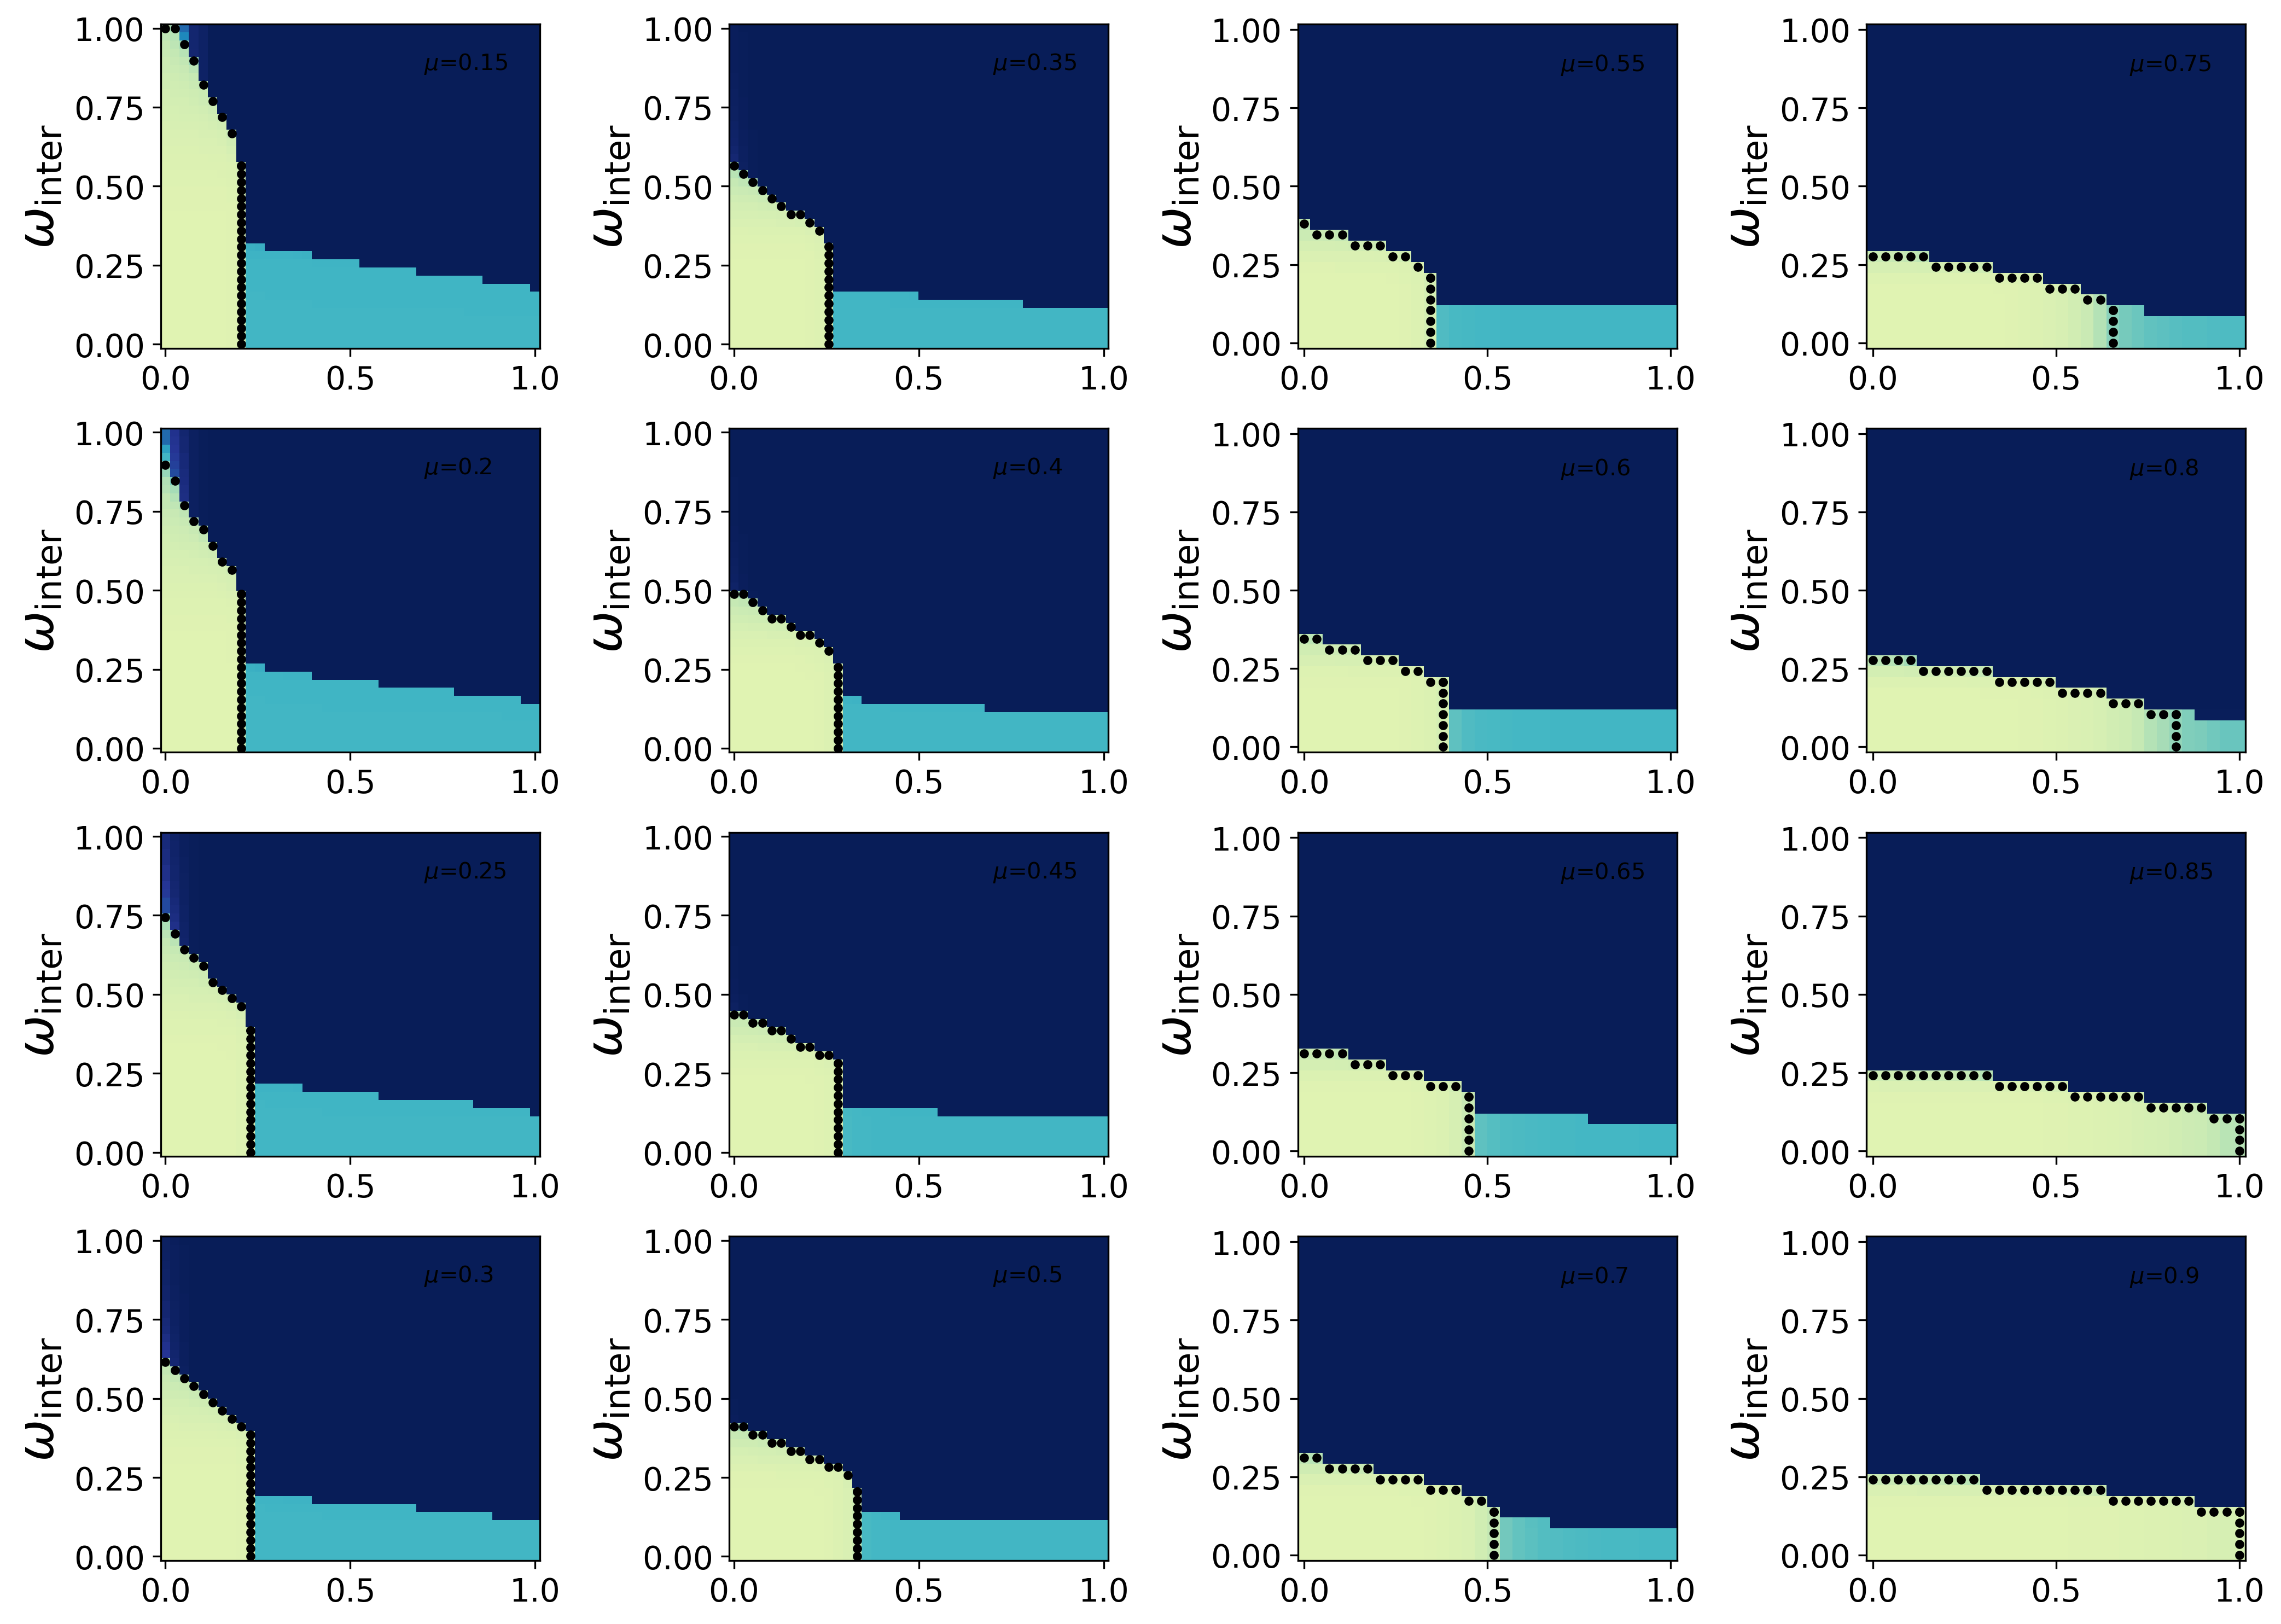

In [14]:
## the exact behavior of the finding the boundary

fig, ax = plt.subplots(4,4, figsize= (14, 10), dpi = 200)

for j in range(4):
    for i in range(4):
        
        plot_diagram(mu_list[i+j*4], ax[i, j])
        
        xy_ = determine_boundary_blue(mu_list[i+j*4])
        
        ax[i, j].plot(xy_[0], xy_[1], 'k.')
        
        ax[i,j].text(0.7, 0.85, f"$\mu$={mu_list[i+j*4]}", va = 'bottom', fontsize = 10)
fig.savefig("TL_approximation.png")

fig, ax = plt.subplots(4,4, figsize= (14, 10), dpi = 300)

for j in range(4):
    for i in range(4):
        
        plot_diagram(mu_list[i+j*4 + 3], ax[i, j])
        
        xy_ = determine_boundary_blue(mu_list[i+j*4 +3])
        
        ax[i, j].plot(xy_[0], xy_[1], 'k.')
        
        ax[i,j].text(0.7, 0.85, f"$\mu$={mu_list[i+j*4 +3 ]}", va = 'bottom', fontsize = 10)
# fig.savefig("PD16.pdf")      

## ER ~ SF compare

In [15]:
def plot_diagram_SF(mu, ax1, lam_ = 3.0):
    
    loc = os.path.join("..","data","appen1-ds", f"mu{mu}lam{lam_}.h5")
    
    f= h5py.File(loc, 'r')
    
    w1_ = f["w1"][()]
    w2_ = f["w2"][()]
    rho = f["rho"][()]
    
#     theta = f["theta"][()]
#     rho_0 = f["rho_0"][()]
    
#     print(f"rho_0: {rho_0}, theta: {theta}")
    
    f.close()
       
    w1_mesh, w2_mesh = np.meshgrid(w1_, w2_)

    p1 = ax1.pcolor(w1_mesh, w2_mesh, rho, shading = 'auto', cmap = 'jet')
    p1.set_clim(0, 1)
#     plt.colorbar(p1, ax = ax1, label = r"$\rho_{\infty}$")
    ax1.set_xlabel(r"$\omega_1$")
    ax1.set_ylabel(r"$\omega_2$")
    plt.tight_layout()
    
    return p1


def plot_simu_diagram_SF(mu, lam, ax_):
    
    loc_ = os.path.join( "..","data","appen1-ds", "theta0.1rho0.17N200000z20mu{}lam{}.h5")

    f = h5py.File(loc_.format(mu, lam), 'r')
    w1_ = f['w1'][()]
    w2_ = f['w2'][()]
    rho_ = f["rho"][()]
    f.close()

    w1Mesh, w2Mesh = np.meshgrid(w1_, w2_)
#     fig, ax = plt.subplots(2,1,figsize = (4, 5.5),dpi = 150)
    pc = ax_.pcolor(w1Mesh, w2Mesh, rho_, shading = 'auto', cmap = 'jet')
    pc.set_clim(0, 1)
#     plt.colorbar(pc, ax = ax_)
    ax_.set_xlabel(r"$\omega_1$")
    ax_.set_ylabel(r"$\omega_2$")
#     ax_.text(0.7, .9, r"simulation")
    plt.tight_layout()
    
    return pc

In [16]:
fig, ax1 = plt.subplots(3, 3, figsize = (12, 9))

pc1 = plot_diagram_SF(0.1, ax1[0, 0])
pc2 = plot_diagram_SF(0.5, ax1[0, 1])
pc3 = plot_diagram_SF(0.9, ax1[0, 2])

ax1[0, 0].set_title(r"$\mu = 0.1$")
ax1[0, 1].set_title(r"$\mu = 0.5$")
ax1[0, 2].set_title(r"$\mu = 0.9$");


pc1 = plot_simu_diagram_SF(0.1, 3, ax1[1, 0])
pc2 = plot_simu_diagram_SF(0.5, 3, ax1[1, 1])
pc3 = plot_simu_diagram_SF(0.9, 3, ax1[1, 2])


pc1 = plot_simu_diagram_SF(0.1, 3.5, ax1[2, 0])
pc2 = plot_simu_diagram_SF(0.5, 3.5, ax1[2, 1])
pc3 = plot_simu_diagram_SF(0.9, 3.5, ax1[2, 2])

ax1[0, 0].text(0.7, 0.9, r"$\lambda = 3$ Analytic", color = 'white')
ax1[0, 1].text(0.7, 0.9, r"$\lambda = 3$ Analytic", color = 'white')
ax1[0, 2].text(0.7, 0.9, r"$\lambda = 3$ Analytic", color = 'white')

ax1[1, 0].text(0.7, 0.9, r"$\lambda = 3$", color = 'white')
ax1[1, 1].text(0.7, 0.9, r"$\lambda = 3$", color = 'white')
ax1[1, 2].text(0.7, 0.9, r"$\lambda = 3$", color = 'white')

ax1[2, 0].text(0.7, 0.9, r"$\lambda = 3.5$", color = 'white')
ax1[2, 1].text(0.7, 0.9, r"$\lambda = 3.5$", color = 'white')
ax1[2, 2].text(0.7, 0.9, r"$\lambda = 3.5$", color = 'white')


fig.subplots_adjust(hspace = 0.2, wspace = 0.3, left = 0.13)
    
fig.colorbar(pc1, ax = ax1, shrink = 0.8, pad = 0.015)

plt.savefig("ER-SF_A_N.pdf", format='pdf', bbox_inches='tight', dpi = 600);

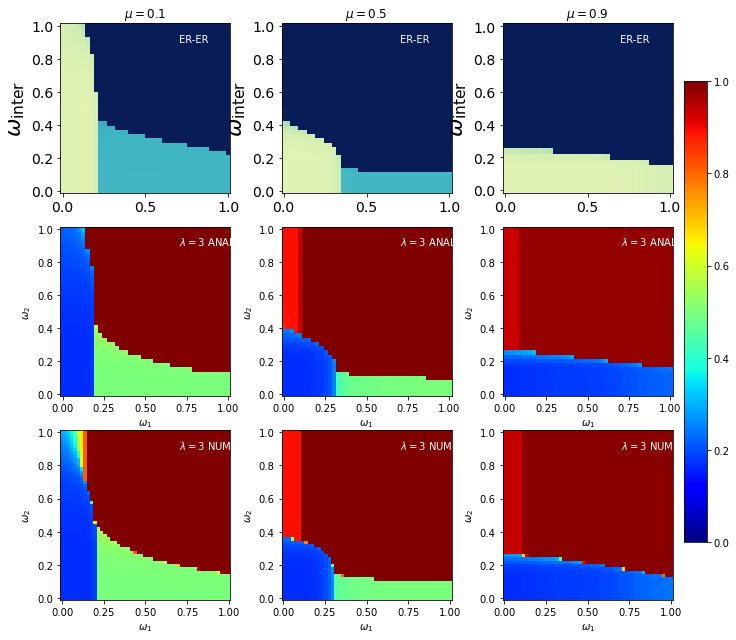

In [17]:
fig, ax1 = plt.subplots(3, 3, figsize = (12, 9))

pc1 = plot_diagram(0.1, ax1[0, 0])
pc2 = plot_diagram(0.5, ax1[0, 1])
pc3 = plot_diagram(0.9, ax1[0, 2])

ax1[0, 0].set_title(r"$\mu = 0.1$")
ax1[0, 1].set_title(r"$\mu = 0.5$")
ax1[0, 2].set_title(r"$\mu = 0.9$");


pc1 = plot_diagram_SF(0.1, ax1[1, 0])
pc2 = plot_diagram_SF(0.5, ax1[1, 1])
pc3 = plot_diagram_SF(0.9, ax1[1, 2])


pc1 = plot_simu_diagram_SF(0.1, 3, ax1[2, 0])
pc2 = plot_simu_diagram_SF(0.5, 3, ax1[2, 1])
pc3 = plot_simu_diagram_SF(0.9, 3, ax1[2, 2])

ax1[0, 0].text(0.7, 0.9, r"ER-ER", color = 'white')
ax1[0, 1].text(0.7, 0.9, r"ER-ER", color = 'white')
ax1[0, 2].text(0.7, 0.9, r"ER-ER", color = 'white')

ax1[1, 0].text(0.7, 0.9, r"$\lambda = 3$ ANALYTIC", color = 'white')
ax1[1, 1].text(0.7, 0.9, r"$\lambda = 3$ ANALYTIC", color = 'white')
ax1[1, 2].text(0.7, 0.9, r"$\lambda = 3$ ANALYTIC", color = 'white')

ax1[2, 0].text(0.7, 0.9, r"$\lambda = 3$ NUMERIC", color = 'white')
ax1[2, 1].text(0.7, 0.9, r"$\lambda = 3$ NUMERIC", color = 'white')
ax1[2, 2].text(0.7, 0.9, r"$\lambda = 3$ NUMERIC", color = 'white')


fig.subplots_adjust(hspace = 0.2, wspace = 0.3, left = 0.13)
    
fig.colorbar(pc1, ax = ax1, shrink = 0.8, pad = 0.015)

plt.savefig("fig_ER-SF_A_N.pdf", format='pdf', bbox_inches='tight', dpi = 600);

### plot fig. 5 => compare the differences between scale-free \& power-law

In [18]:
def plot_simu_diagram_SF(mu, lam, ax_):
    
    loc_ = os.path.join( "..","data","appen1-ds", "theta0.1rho0.17N200000z20mu{}lam{}.h5")

    f = h5py.File(loc_.format(mu, lam), 'r')
    w1_ = f['w1'][()]
    w2_ = f['w2'][()]
    rho_ = f["rho"][()]
    f.close()

    w1Mesh, w2Mesh = np.meshgrid(w1_, w2_)
    pc = ax_.pcolor(w1Mesh, w2Mesh, rho_, shading = 'auto', cmap='YlGnBu')
    pc.set_clim(0, 1)
    
    ax_.tick_params(axis='both', which='major', labelsize=13)
    ax_.set_xticks([0.0, 0.5, 1.0])
    ax_.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    ax_.set_xlabel(r"$\omega_{\mathrm{intra}}$", fontsize = 22)
    ax_.set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = 22)
    plt.tight_layout()
    
    return pc

def plot_diagram_SF(mu, ax1, lam_ = 3.0):
    
    loc = os.path.join("..","data","appen1-ds", f"mu{mu}lam{lam_}.h5")
    
    f= h5py.File(loc, 'r')
    
    w1_ = f["w1"][()]
    w2_ = f["w2"][()]
    rho = f["rho"][()]
    
    f.close()
       
    w1_mesh, w2_mesh = np.meshgrid(w1_, w2_)

    p1 = ax1.pcolor(w1_mesh, w2_mesh, rho, shading = 'auto', cmap='YlGnBu')
    p1.set_clim(0, 1)
#     plt.colorbar(p1, ax = ax1, label = r"$\rho_{\infty}$")
    ax1.tick_params(axis='both', which='major', labelsize=13)
    ax1.set_xticks([0.0, 0.5, 1.0])
    ax1.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
                   
    ax1.set_xlabel(r"$\omega_{\mathrm{intra}}$", fontsize = 22)
    ax1.set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = 22)
    
    plt.tight_layout()
    
    return p1

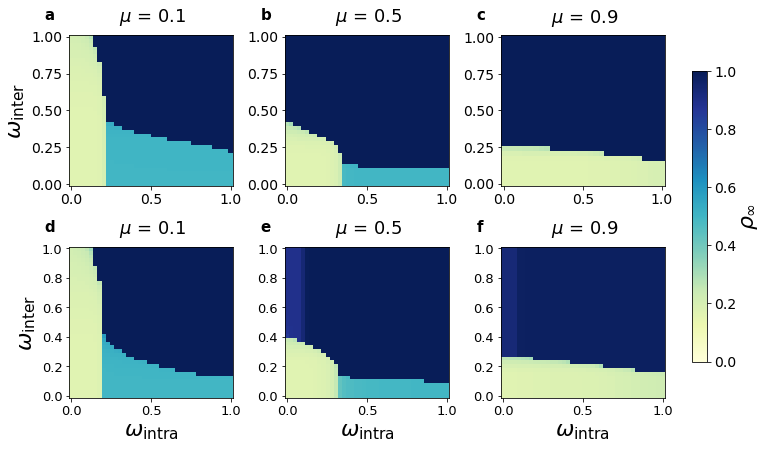

In [19]:
fig, ax1 = plt.subplots(2, 3, figsize = (12, 6))

pc1 = plot_diagram(0.1, ax1[0, 0])
pc2 = plot_diagram(0.5, ax1[0, 1])
pc3 = plot_diagram(0.9, ax1[0, 2])

pc1 = plot_diagram_SF(0.1, ax1[1, 0])
pc2 = plot_diagram_SF(0.5, ax1[1, 1])
pc3 = plot_diagram_SF(0.9, ax1[1, 2])

ax1[0, 0].text(0.3, 1.1, r"$\mu$ = 0.1", color = 'k', fontsize = 18)
ax1[0, 1].text(0.3, 1.1, r"$\mu$ = 0.5", color = 'k', fontsize = 18)
ax1[0, 2].text(0.3, 1.1, r"$\mu$ = 0.9", color = 'k', fontsize = 18)

ax1[1, 0].text(0.3, 1.1, r"$\mu$ = 0.1", color = 'k', fontsize = 18)
ax1[1, 1].text(0.3, 1.1, r"$\mu$ = 0.5", color = 'k', fontsize = 18)
ax1[1, 2].text(0.3, 1.1, r"$\mu$ = 0.9", color = 'k', fontsize = 18)


ax1[0, 0].annotate(r"a", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[0, 1].annotate(r"b", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[0, 2].annotate(r"c", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 0].annotate(r"d", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 1].annotate(r"e", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 2].annotate(r"f", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')

for i in range(2): # 遍历行
    for j in range(3): # 遍历列
        ax = ax1[i, j]
        if i == 0:
            ax.set_xlabel(None)
        if j > 0:
            ax.set_ylabel(None)
            
fig.subplots_adjust(hspace = 0.4, wspace = 0.32, left = 0.13)
    
cb = fig.colorbar(pc1, ax = ax1, shrink = 0.8, pad = 0.038)

cb.set_label(r"$\rho_\infty$", fontsize=22)
cb.ax.tick_params(labelsize=14)

plt.savefig("fig5.pdf", format='pdf', bbox_inches='tight', dpi = 600);

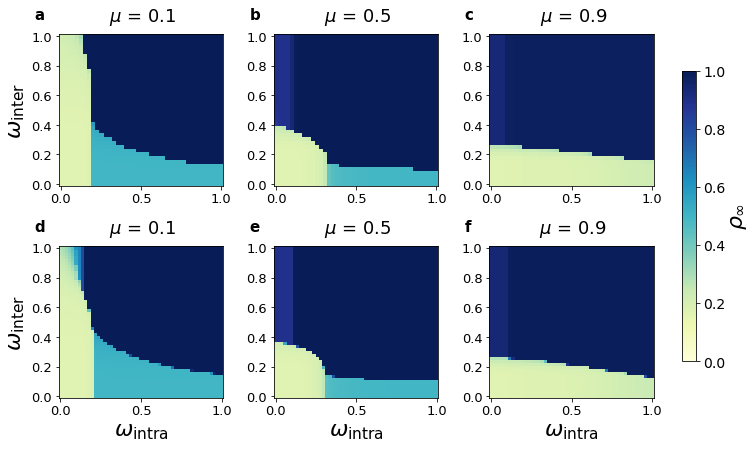

In [20]:
# 放正文中fig4（命名为fig5）是这一张图

fig, ax1 = plt.subplots(2, 3, figsize = (12, 6))

pc1 = plot_diagram_SF(0.1, ax1[0, 0])
pc2 = plot_diagram_SF(0.5, ax1[0, 1])
pc3 = plot_diagram_SF(0.9, ax1[0, 2])

pc1 = plot_simu_diagram_SF(0.1, 3, ax1[1, 0])
pc2 = plot_simu_diagram_SF(0.5, 3, ax1[1, 1])
pc3 = plot_simu_diagram_SF(0.9, 3, ax1[1, 2])

ax1[0, 0].text(0.3, 1.1, r"$\mu$ = 0.1", color = 'k', fontsize = 18)
ax1[0, 1].text(0.3, 1.1, r"$\mu$ = 0.5", color = 'k', fontsize = 18)
ax1[0, 2].text(0.3, 1.1, r"$\mu$ = 0.9", color = 'k', fontsize = 18)

ax1[1, 0].text(0.3, 1.1, r"$\mu$ = 0.1", color = 'k', fontsize = 18)
ax1[1, 1].text(0.3, 1.1, r"$\mu$ = 0.5", color = 'k', fontsize = 18)
ax1[1, 2].text(0.3, 1.1, r"$\mu$ = 0.9", color = 'k', fontsize = 18)


ax1[0, 0].annotate(r"a", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[0, 1].annotate(r"b", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[0, 2].annotate(r"c", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 0].annotate(r"d", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 1].annotate(r"e", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 2].annotate(r"f", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')

for i in range(2): # 遍历行
    for j in range(3): # 遍历列
        ax = ax1[i, j]
        if i == 0:
            ax.set_xlabel(None)
        if j > 0:
            ax.set_ylabel(None)

            
fig.subplots_adjust(hspace = 0.4, wspace = 0.31, left = 0.13)
    
cb = fig.colorbar(pc1, ax = ax1, shrink = 0.8, pad = 0.038)

cb.set_label(r"$\rho_\infty$", fontsize=22)
cb.ax.tick_params(labelsize=14)

plt.savefig("fig5_v2.pdf", format='pdf', bbox_inches='tight', dpi = 600);

## scale property

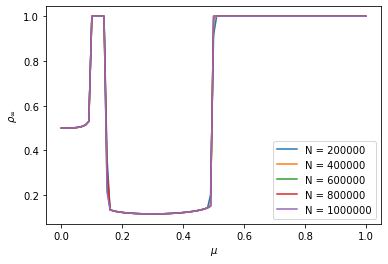

In [21]:
w1 = 0.7
w2 = 1
nu_list = np.arange(0, 101, 1)/100
N_list = list([2, 4, 6, 8, 10])

rho_ = np.zeros((101, 5))


for n_ in range(len(N_list)):
    n = N_list[n_]
    
    i = 0
    for nu in nu_list:

        if int(nu) == nu: nu = int(nu)
        
   
    
        path = os.path.join("..","data","appen2-ds", f"dataN{n*100000}", f"w1{w1}w2{w2}nu{nu}.out" )

        lines = [x.rstrip() for x in open(path)]

        A = np.array([float(j) for i in range(len(lines)) for j in lines[i].split(" ")]) 

        rho_[i, n_] = A.mean()
        i += 1
        
fig, ax = plt.subplots()

for i in range(len(N_list)):
    ax.plot(nu_list, rho_[:, i], label = f"N = {N_list[i]*100000}")
    
ax.legend()
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\rho_{\infty}$");

fig.savefig("sp.pdf", format = "pdf", bbox_inches = "tight", dpi = 600)